# 2.6 Подбор параметров и ROC and Roll

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from graphviz  import Source
from IPython.display import SVG, display, HTML
style = "<style>svg{width: 70% !important; height: 60% !important;} </style>" 

In [7]:
titanic_data = pd.read_csv('train.csv')

In [3]:
X = titanic_data.drop(['PassengerId','Survived','Name','Ticket','Cabin'], axis=1)
y = titanic_data.Survived

In [4]:
X = pd.get_dummies(X)

In [5]:
 X = X.fillna({'Age':X.Age.median()})

In [6]:
# from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [ ]:
# from sklearn.model_selection import cross_val_score

In [8]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [9]:
cross_val_score(clf, X_train, y_train, cv=5)

array([0.76666667, 0.82352941, 0.78991597, 0.75630252, 0.80672269])

In [10]:
cross_val_score(clf, X_train, y_train, cv=5).mean()

0.7886274509803922

In [11]:
max_depth_values = range(1,100)
scores_data = pd.DataFrame()

In [12]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth],
                                    'train_score': [train_score],
                                    'test_score': [test_score],
                                   'cross_val_score':[mean_cross_val_score]})
    scores_data = scores_data.append(temp_score_data)

In [13]:
scores_data_long = pd.melt(scores_data, id_vars = ['max_depth'],
                           value_vars=['train_score','test_score','cross_val_score'], 
                           var_name='set_type', value_name ='score')

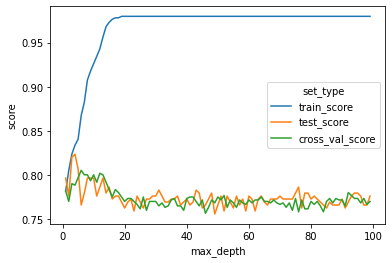

In [14]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long)

In [15]:
from sklearn.model_selection import GridSearchCV

In [16]:
clf=tree.DecisionTreeClassifier()
parametrs={'criterion':['gini', 'entropy'], 'max_depth': range(1, 30)}


In [17]:
grid_search_cv_clf=GridSearchCV(clf, parametrs, cv=5)

In [18]:
grid_search_cv_clf

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)})

In [19]:
# Обучаемся
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)})

In [20]:
grid_search_cv_clf.best_params_

{'criterion': 'entropy', 'max_depth': 11}

In [ ]:
# parametrs={'criterion':['gini', 'entropy'], 'max_depth': range(1, 30)}
# clf=tree.DecisionTreeClassifier()
# grid_search_cv_clf=GridSearchCV(clf, parametrs, cv=5)
# grid_search_cv_clf.fit(X_train, y_train)
# grid_search_cv_clf.best_params_


In [23]:
best_clf = grid_search_cv_clf.best_estimator_

In [24]:
best_clf

DecisionTreeClassifier(criterion='entropy', max_depth=11)

In [25]:
best_clf.score(X_test, y_test)

0.7694915254237288

In [26]:
from sklearn.metrics import precision_score

In [27]:
y_pred = best_clf.predict(X_test)

In [29]:
precision_score(y_test, y_pred)

0.75

In [30]:
from sklearn.metrics import recall_score

In [31]:
recall_score(y_test, y_pred)

0.65

In [32]:
y_predicted_prob = best_clf.predict_proba(X_test)

In [34]:
y_pred

array([1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0])

In [33]:
y_predicted_prob

array([[0.42857143, 0.57142857],
       [1.        , 0.        ],
       [0.86206897, 0.13793103],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.14285714, 0.85714286],
       [0.86206897, 0.13793103],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.91666667, 0.08333333],
       [0.72727273, 0.27272727],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.71428571, 0.28571429],
       [0.96511628, 0.03488372],
       [1.        , 0.        ],
       [0.96511628, 0.03488372],
       [0.5       , 0.5       ],
       [0.71428571, 0.28571429],
       [0.86206897, 0.13793103],
       [0.96511628, 0.03488372],
       [1.        , 0.        ],
       [0.5       , 0.5       ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.

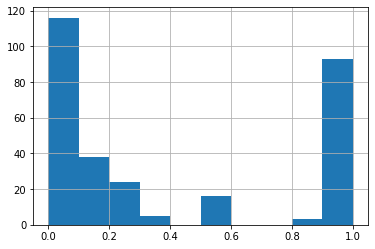

In [36]:
pd.Series(y_predicted_prob[:,1]).hist()

In [37]:
# изменим порог вероятности (относить к 0 или 1  выжил или не совсем)
np.where(y_predicted_prob[:,1] > 0.8, 1, 0)

array([0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0])

In [54]:
y_pred = np.where(y_predicted_prob[:,1] > 0.8, 1, 0)

In [39]:
precision_score(y_test, y_pred)

0.7916666666666666

In [40]:
recall_score(y_test, y_pred)

0.6333333333333333

In [56]:
y_pred = np.where(y_predicted_prob[:,1] > 0.1, 1, 0)

In [51]:
precision_score(y_test, y_pred)

0.553072625698324

In [52]:
recall_score(y_test, y_pred)

0.825

In [44]:
pd.Series(y_predicted_prob[:,1]).unique()

array([0.57142857, 0.        , 0.13793103, 1.        , 0.85714286,
       0.08333333, 0.27272727, 0.28571429, 0.03488372, 0.5       ,
       0.22222222, 0.1627907 , 0.33333333, 0.6       ])

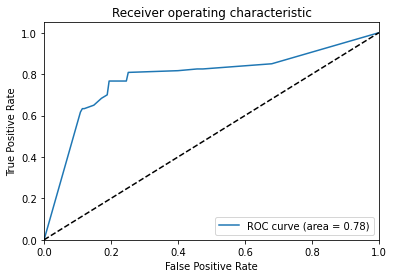

In [57]:
# Рисуем рок кривую
from sklearn.metrics import roc_curve, auc
pr, tpr, thresholds = roc_curve(y_test, y_predicted_prob[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1] , 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

In [47]:
# скопировал с комментов
# from sklearn.metrics import roc_curve, auc
# fpr, tpr, thresholds = roc_curve(y_test, y_predicted_prob[:,1])
# roc_auc= auc(fpr, tpr)
# plt.figure()
# plt.plot(fpr, tpr, color='darkorange',
#          lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
# plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver operating characteristic example')
# plt.legend(loc="lower right")
# plt.show()
